<a href="https://colab.research.google.com/github/Edwina-Yeo/LTCC-Math-Bio/blob/main/Multiple_Scales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.special import jv as besselj

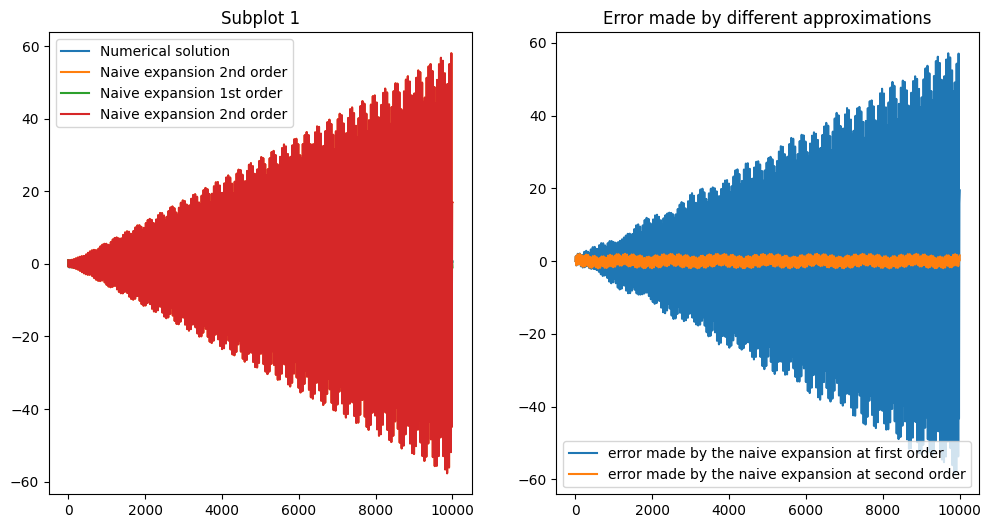

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the Duffing equation
def duffing(r, t, eps):
    x, y = r
    dxdt = y
    dydt = -x - eps * (x**3)
    return [dxdt, dydt]

# Parameters
eps = 0.5
t = np.linspace(0, 10000, 1000)
initial_conditions = [0, 1]

# Solve ODE
r = odeint(duffing, initial_conditions, t, args=(eps,))

# Plot results
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.plot(t, r[:, 1], label='Numerical solution')
plt.plot(t, np.cos(t) + eps * (1/32 * (np.cos(3*t) - np.cos(t) - 3/8 * t * np.sin(t))), label='Naive expansion 2nd order')
plt.plot(t, np.cos(t), label='Naive expansion 1st order')
plt.plot(t, np.cos(t) + eps * (1/32 * (np.cos(3*t) - np.cos(t) - 3/8 * t * np.sin(t))), label='Naive expansion 2nd order')

plt.legend()
plt.title('Subplot 1')

# Subplot 2
er_y0 = r[:, 1] - np.cos(t)
er_y1 = r[:, 1] - np.cos(t) + eps * (1/32 * (np.cos(3*t) - np.cos(t) - 3/8 * t * np.sin(t)))
plt.subplot(1, 2, 2)
plt.plot(t, er_y1, label='error made by the naive expansion at first order')
plt.plot(t, er_y0, label='error made by the naive expansion at second order')
plt.legend()
plt.title('Error made by different approximations')

plt.show()

# Section 2: Bacterial swimming dynamics:


In this notebook we will evalutate the solution of the bacterial dynamics derived using method of multiple scale. We consider a bacteria which swims at a fixed speed $V$, the swimmer has a prefered angle $\Phi$ at which it swims but it oscillates rapidly around this preferred angle.

This is an example of a system in which: we have periodic fast dynamics and non-periodic slow dynamics.


**Literature:**
* 2D yawing of spheroids: Walker BJ, Ishimoto, K, Gaffney, EA, Moreau, C, Dalwadi, MP. Physical Review Fluids (2022), 7(2): 023101.
*  Method of multiple scales notes - see e.g. Chapter 11 of Bender & Orszag



Full Model

1.  $\frac{dx}{dt}=Vcos(\theta) $

2.  $\frac{dx}{dt}=Vcos(\theta) $

3. $\theta=1+Acos(\omega t) $

We have $\omega\gg1$ so that the angle oscillations are fast.


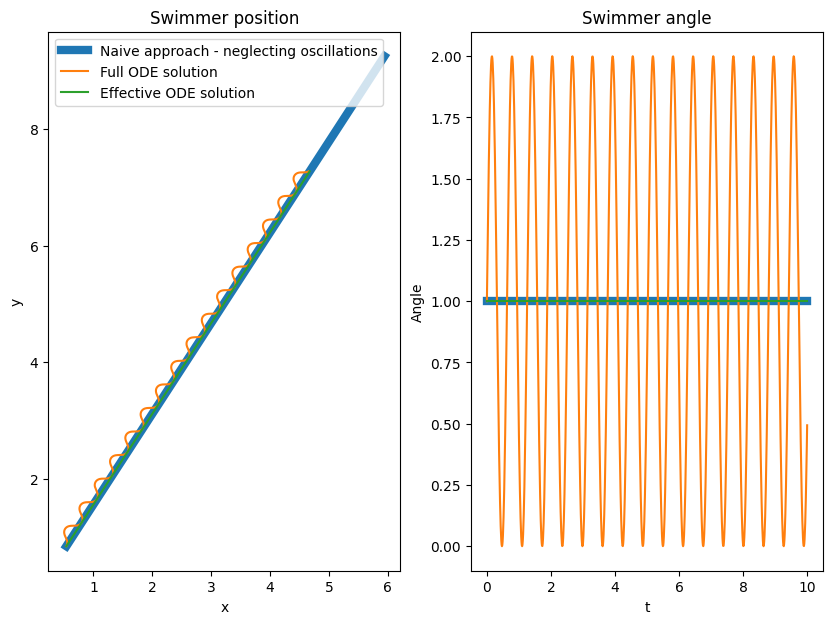

In [46]:
# Model parameters
A = 1  # Amplitude of angle oscillations
omega = 10  # Timescale of swimmer orientation oscillations - must be large
V = 1  # Swimmer speed

# Define the effective and full ODE functions
def effective(t,y):
    return [V * np.cos(1), V * np.sin(1)]

def full(t,y):
    # print(omega)
    A = 1  # Amplitude of angle oscillations
    omega = 10  # Timescale of swimmer orientation oscillations - must be large
    V = 1  # Swimmer speed
    return [V * np.cos(1 + A * np.sin(omega * t)), V * np.sin(1 + A * np.sin(omega * t))]

# Naive approach where we neglect angle oscillations
t = np.linspace(0, 10, 1000)

sol_naive =  solve_ivp(effective, [0,10], [np.cos(1), np.sin(1)],t_eval=t,rtol=1e-8)
r_naive=sol_naive.y

# Solve the ODE numerically
sol = solve_ivp(full,[0,10], [np.cos(1), np.sin(1)],t_eval=t,rtol=1e-8)
r=sol.y

# Solve the dynamics of the swimmers using effective model
V=V * besselj(0, A)
sol_eff = solve_ivp(effective, [0,10], [np.cos(1), np.sin(1)],t_eval=t,rtol=1e-8)
r_eff=sol_eff.y

# Plotting
plt.figure(figsize=(10,7))

plt.subplot(1, 2, 1)
plt.plot(r_naive[ 0,:], r_naive[1,:], linewidth=6, label='Naive approach - neglecting oscillations')
plt.plot(r[0,:], r[ 1,:], label='Full ODE solution')
plt.plot(r_eff[0,:], r_eff[1,:], label='Effective ODE solution')
plt.legend()
plt.title('Swimmer position')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.plot(t, np.ones_like(t), linewidth=6, label='Constant angle')
plt.plot(t, 1 + A * np.sin(omega * t), label='Oscillating angle')
plt.plot(t, np.ones_like(t), label='Constant angle')
plt.ylabel('Angle')
plt.xlabel('t')
plt.title('Swimmer angle')
plt.show()